In [1]:
import gymnasium as gym
import my_package
import torch
import numpy as np
import matplotlib.pyplot as plt

from my_package import DQN, select_action

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
data = torch.load('model_with_data_1000_ep.pth')
state_dim = data['state_dim']
action_dim = data['action_dim']
hidden_layer_dim = data['hidden_layer_dim']
training_ep = data['max_episodes']

print(f'Loaded training results after {training_ep} Episodes')

""" Init neural networks """
policy_net = DQN(
    state_dim=state_dim,
    action_dim=action_dim,
    device=device,
    hidden_dim=hidden_layer_dim,
)

policy_net.load_state_dict(data['model_state_dict'])

C:\Users\paolo\AppData\Local\Temp\ipykernel_20508\873696440.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load('model_with_data_1000_ep.pth')


Loaded training results after 1000 Episodes


<All keys matched successfully>

In [3]:
env = gym.make('ShipQuest-v0', render_mode='human', prox_sensor=True, draw_proximity_sensor=True)

for ep in range(3):
    state, info = env.reset()
    done = False
    total_reward = 0
    while not done:
        action = select_action(state, policy_net, 0, action_dim)
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        state = next_state
        total_reward += reward
    print('total reward: ' + str(total_reward))
env.close()

C:\Users\paolo\miniconda3\envs\gymenv\Lib\site-packages\gymnasium\envs\registration.py:513: DeprecationWarning: WARN: The environment ShipQuest-v0 is out of date. You should consider upgrading to version `v1`.
  logger.deprecation(


total reward: -7.839999999999941
total reward: -10.47999999999998
total reward: -12.969999999999969


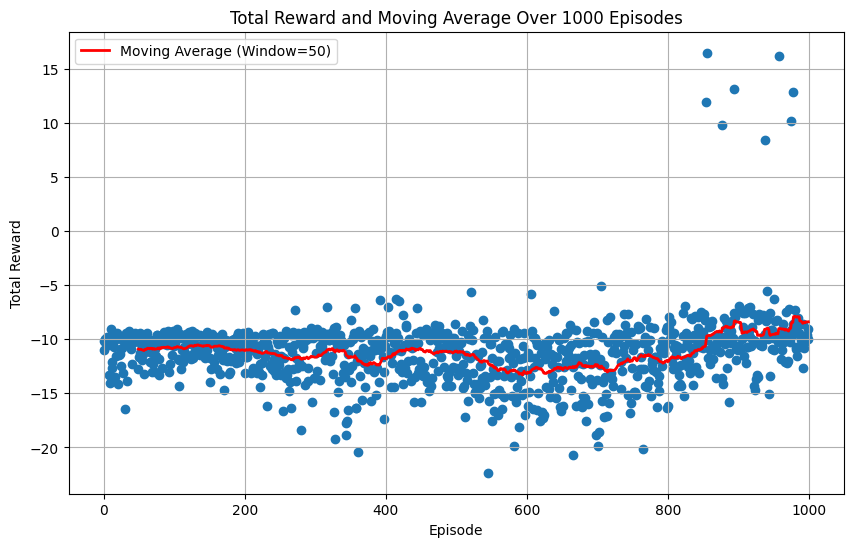

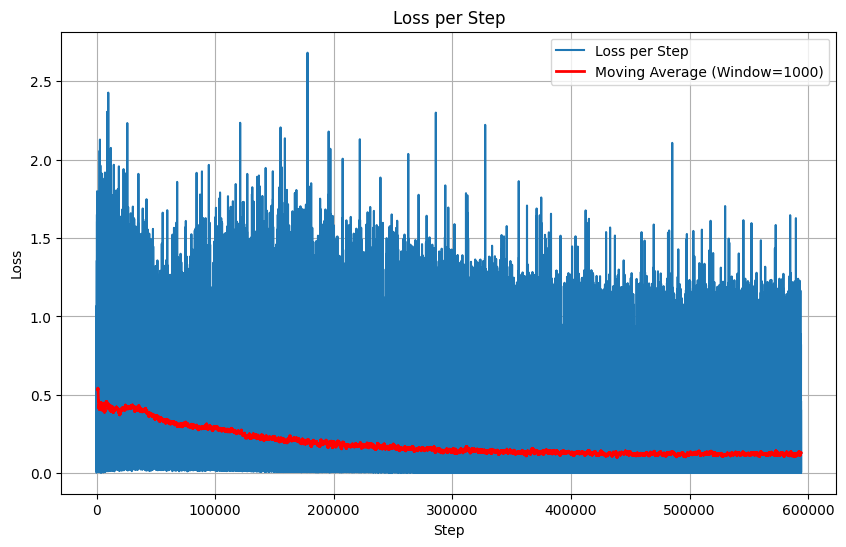

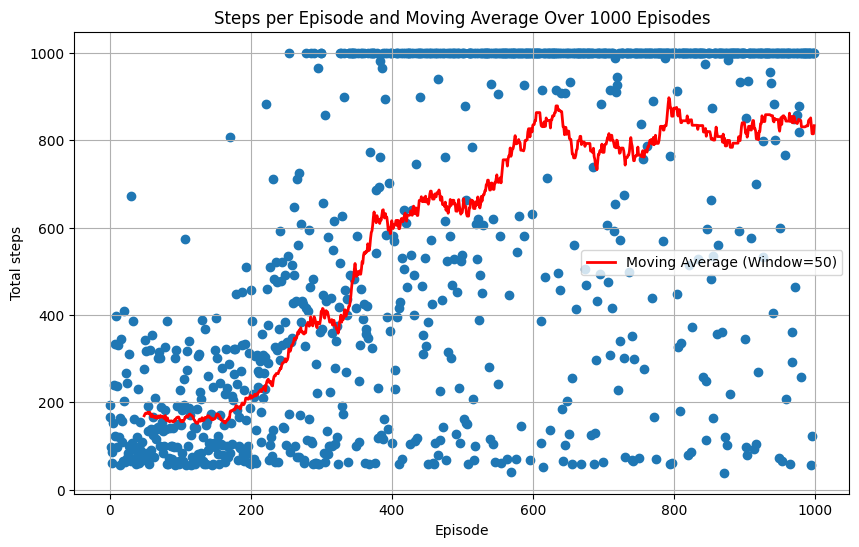

In [8]:
total_rewards = data['total_rewards']
loss_history = data['loss_history']
len_episodes = data['len_episodes']

""" Plot rewards """
window_size = 50
ma_reward = np.convolve(total_rewards, np.ones(window_size) / window_size, mode='valid')
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(total_rewards)), total_rewards)
plt.plot(np.arange(window_size - 1, len(total_rewards)), ma_reward, color='red', label=f'Moving Average (Window={window_size})', linewidth=2)
plt.title(f'Total Reward and Moving Average Over {training_ep} Episodes')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.legend()
plt.grid(True)
plt.show()

""" Plot loss per step """
window_size = 1000
ma_loss = np.convolve(loss_history, np.ones(window_size) / window_size, mode='valid')
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(loss_history)), loss_history, label='Loss per Step')
plt.plot(np.arange(window_size - 1, len(loss_history)), ma_loss, color='red', label=f'Moving Average (Window={window_size})', linewidth=2)
plt.title('Loss per Step')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

""" Plot episode duration """
window_size = 50
ma_steps = np.convolve(len_episodes, np.ones(window_size) / window_size, mode='valid')
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(len_episodes)), len_episodes)
plt.plot(np.arange(window_size - 1, len(len_episodes)), ma_steps, color='red', label=f'Moving Average (Window={window_size})', linewidth=2)
plt.title(f'Steps per Episode and Moving Average Over {training_ep} Episodes')
plt.xlabel('Episode')
plt.ylabel('Total steps')
plt.legend()
plt.grid(True)
plt.show()